# <h1> <center> 🛖 Exploratory data analysis

In [3]:
import sys
print(sys.version)

3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]


In [4]:
# Eliminar campos
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno 
import plotly.express as px
import plotly.graph_objects as go

## 💵 Indice de riqueza en el Perú:


In [5]:
path = '/content/drive/MyDrive/22_Hackathon/datos_Peru/per_relative_wealth_index.csv'
df = pd.read_csv(path)
df

latitude  longitude    rwi  error
0     -10.282491 -77.552490 -0.437  0.373
1      -6.064086 -75.838623 -0.552  0.430
2     -12.801088 -74.652100 -0.067  0.485
3     -10.757763 -77.684326 -0.182  0.453
4     -13.998036 -75.179443 -0.555  0.402
...          ...        ...    ...    ...
34418 -12.972442 -74.871826  0.084  0.439
34419 -13.656662 -73.223877 -0.450  0.481
34420 -12.608176 -72.762451 -0.244  0.454
34421  -5.276948 -78.760986 -0.653  0.564
34422 -13.528519 -73.883057 -0.099  0.499

[34423 rows x 4 columns]

In [118]:
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', color='rwi', color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=4,
                  mapbox_style="carto-positron")
fig.show()

In [7]:
df.describe()

latitude     longitude           rwi         error
count  34423.000000  34423.000000  34423.000000  34423.000000
mean     -10.178064    -75.398830     -0.341041      0.457200
std        3.788630      3.139648      0.410136      0.052903
min      -18.344098    -81.309815     -2.022000      0.346000
25%      -13.464422    -78.057861     -0.611000      0.415000
50%      -10.217625    -75.860596     -0.406000      0.444000
75%       -6.719165    -73.135986     -0.146000      0.492000
max       -0.076904    -68.653565      1.865000      0.699000

## 🔍 EDA: valorización

In [8]:
ruta = '/content/drive/MyDrive/22_Hackathon/datos_Peru/Copia de dataset_tasacion_train_vf.xlsx'
campos = pd.read_excel(ruta, header = 0)
campos.head(6)

Fecha entrega del Informe  Tipo de vía Piso Departamento Provincia  \
0                2020-02-16          1.0  NaN        Piura     Piura   
1                2019-05-21          1.0  NaN         Lima      Lima   
2                2020-04-11          1.0  NaN        Junín    Satipo   
3                2016-05-24          1.0  NaN         Lima      Lima   
4                2016-01-12          3.0  NaN         Lima      Lima   
5                2019-04-26          3.0  NaN         Lima      Lima   

                Distrito  Número de estacionamiento  Depósitos  \
0  Veintiseis de Octubre                        NaN        NaN   
1              Surquillo                        1.0        0.0   
2                 Satipo                        0.0        0.0   
3      Santiago de Surco                        0.0        0.0   
4                   Lima                        0.0        0.0   
5              San Borja                        NaN        NaN   

   Latitud (Decimal)  Longitud (Decimal)    Categoría del bien Posición  \
0          -5.163182          -80.682388  Vivienda Unifamiliar      NaN   
1         -12.115286          -77.003768          Departamento      NaN   
2         -11.235446          -74.629221  Vivienda Unifamiliar      NaN   
3         -12.126384          -76.975707               Oficina      NaN   
4         -12.089613          -76.994475  Vivienda Unifamiliar      NaN   
5         -12.093918          -77.001524          Departamento      NaN   

   Número de frentes  Edad  Elevador Estado de conservación  \
0                NaN   0.0       NaN        En construcción   
1                NaN   1.0       NaN                  Bueno   
2                NaN   7.0       NaN                Regular   
3                NaN   0.0       NaN                    NaN   
4                NaN  43.0       NaN                    NaN   
5                NaN   0.0       NaN                    NaN   

                Método Representado Área Terreno Área Construcción  \
0     Costos o reposición (directo)        62.50             27.58   
1  Comparación de mercado (directo)         9.32             57.47   
2     Costos o reposición (directo)       126.00             84.00   
3  Comparación de mercado (directo)         8.60             82.34   
4  Comparación de mercado (directo)       357.55            423.22   
5  Comparación de mercado (directo)        11.43             90.00   

   Valor comercial (USD)  
0                  25278  
1                 110807  
2                  42285  
3                 165503  
4                 711009  
5                 204300

In [9]:
campos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53254 entries, 0 to 53253
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Fecha entrega del Informe  53254 non-null  datetime64[ns]
 1   Tipo de vía                48243 non-null  float64       
 2   Piso                       21 non-null     object        
 3   Departamento               53254 non-null  object        
 4   Provincia                  53254 non-null  object        
 5   Distrito                   53254 non-null  object        
 6   Número de estacionamiento  45330 non-null  float64       
 7   Depósitos                  45261 non-null  float64       
 8   Latitud (Decimal)          52391 non-null  float64       
 9   Longitud (Decimal)         52337 non-null  float64       
 10  Categoría del bien         50805 non-null  object        
 11  Posición                   113 non-null    object        
 12  Núme

Conversión de campos 'Área del terreno' y 'Area de construcción' a tipo float

In [10]:
A = pd.concat([campos['Área Terreno'].str.split()
                       .str[0]
                       .str.replace(',','').astype(float) for col in campos], axis=1)
B = pd.concat([campos['Área Construcción'].str.split()
                       .str[0]
                       .str.replace(',','').astype(float) for col in campos], axis=1)

In [11]:
campos['Área Terreno'] = A.iloc[:,0]
campos['Área Construcción'] = B.iloc[:,0]

In [12]:
campos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53254 entries, 0 to 53253
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Fecha entrega del Informe  53254 non-null  datetime64[ns]
 1   Tipo de vía                48243 non-null  float64       
 2   Piso                       21 non-null     object        
 3   Departamento               53254 non-null  object        
 4   Provincia                  53254 non-null  object        
 5   Distrito                   53254 non-null  object        
 6   Número de estacionamiento  45330 non-null  float64       
 7   Depósitos                  45261 non-null  float64       
 8   Latitud (Decimal)          52391 non-null  float64       
 9   Longitud (Decimal)         52337 non-null  float64       
 10  Categoría del bien         50805 non-null  object        
 11  Posición                   113 non-null    object        
 12  Núme

### ⛏ Valores faltantes

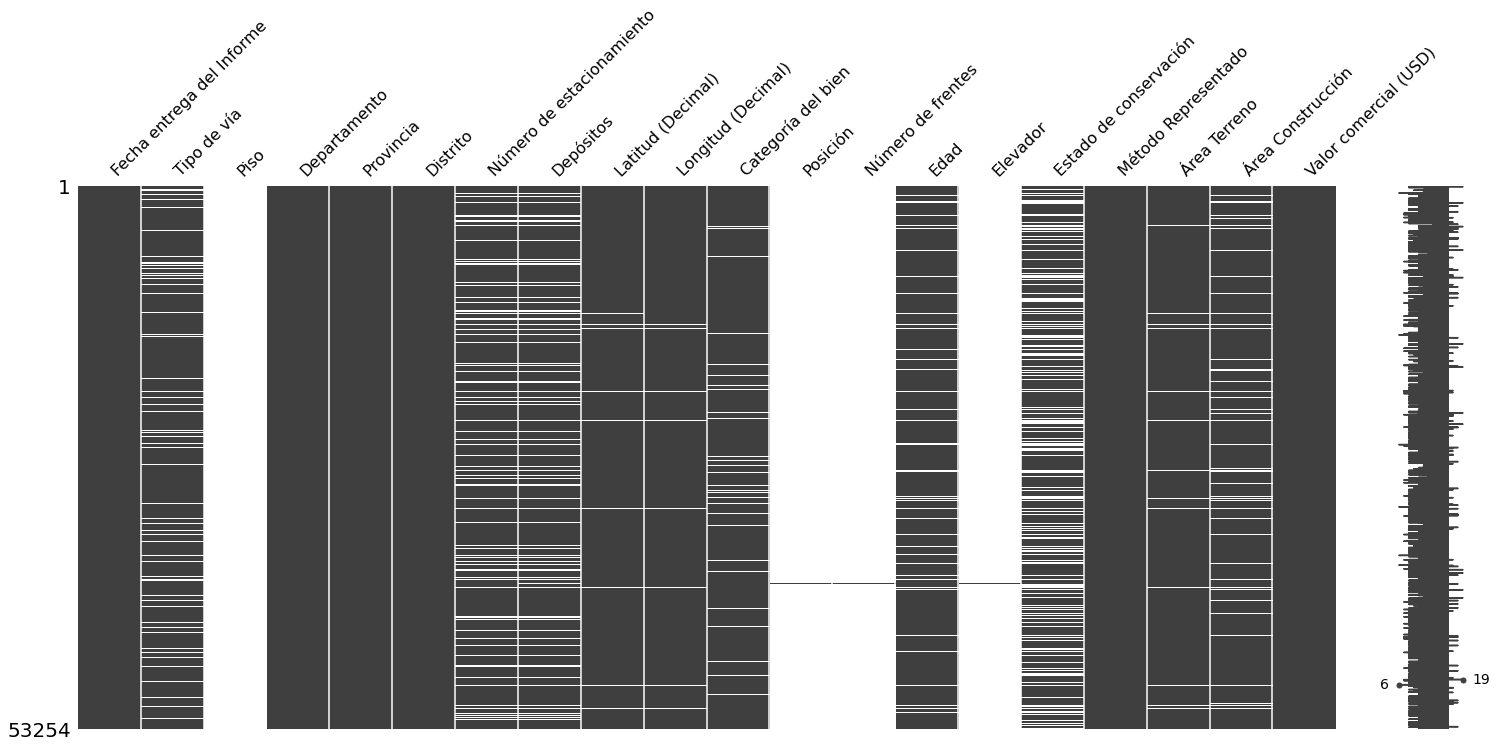

In [13]:
msno.matrix(campos)

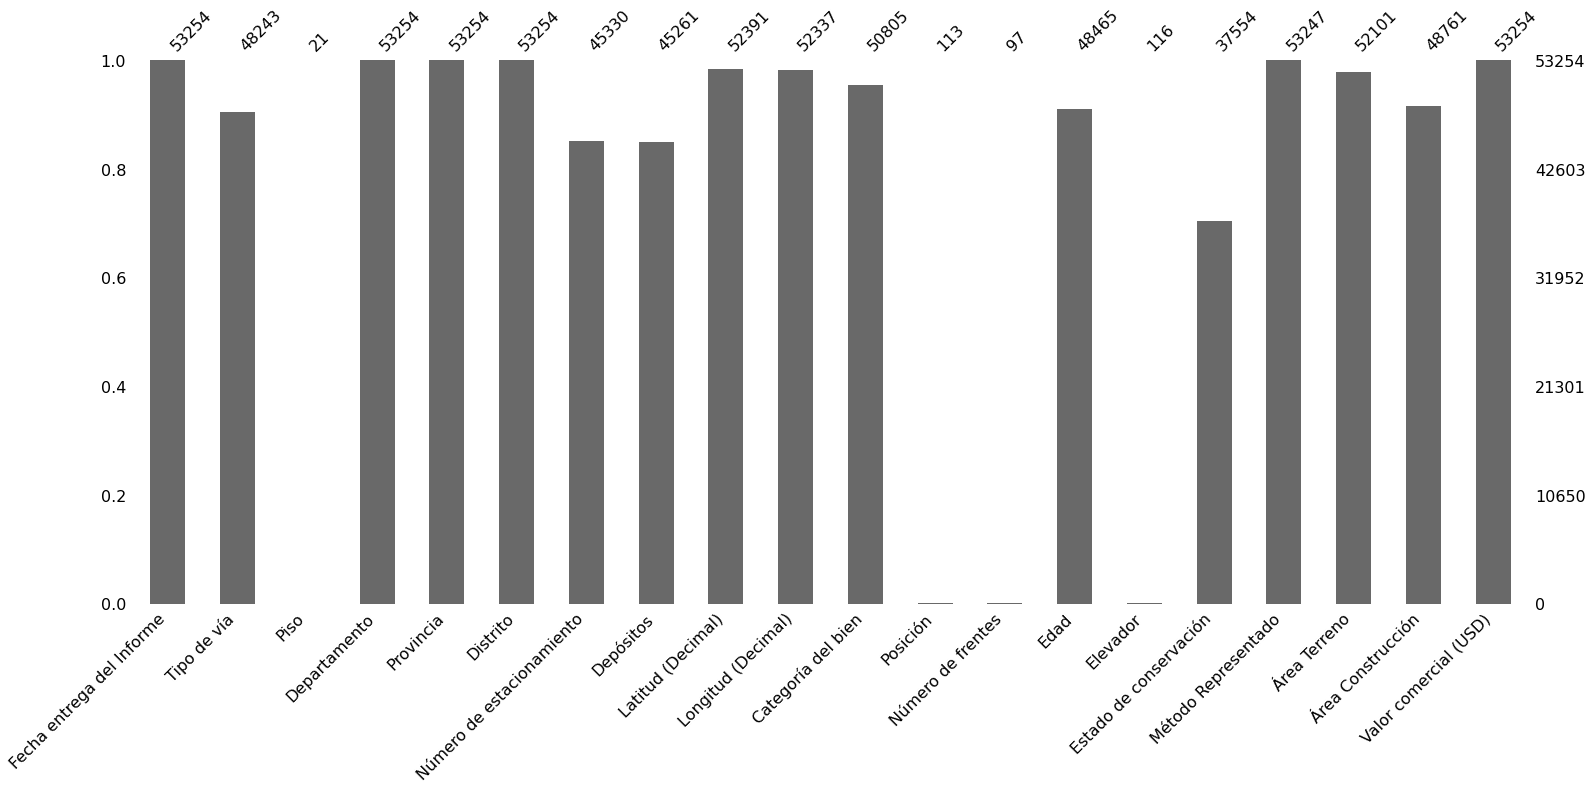

In [14]:
msno.bar(campos)

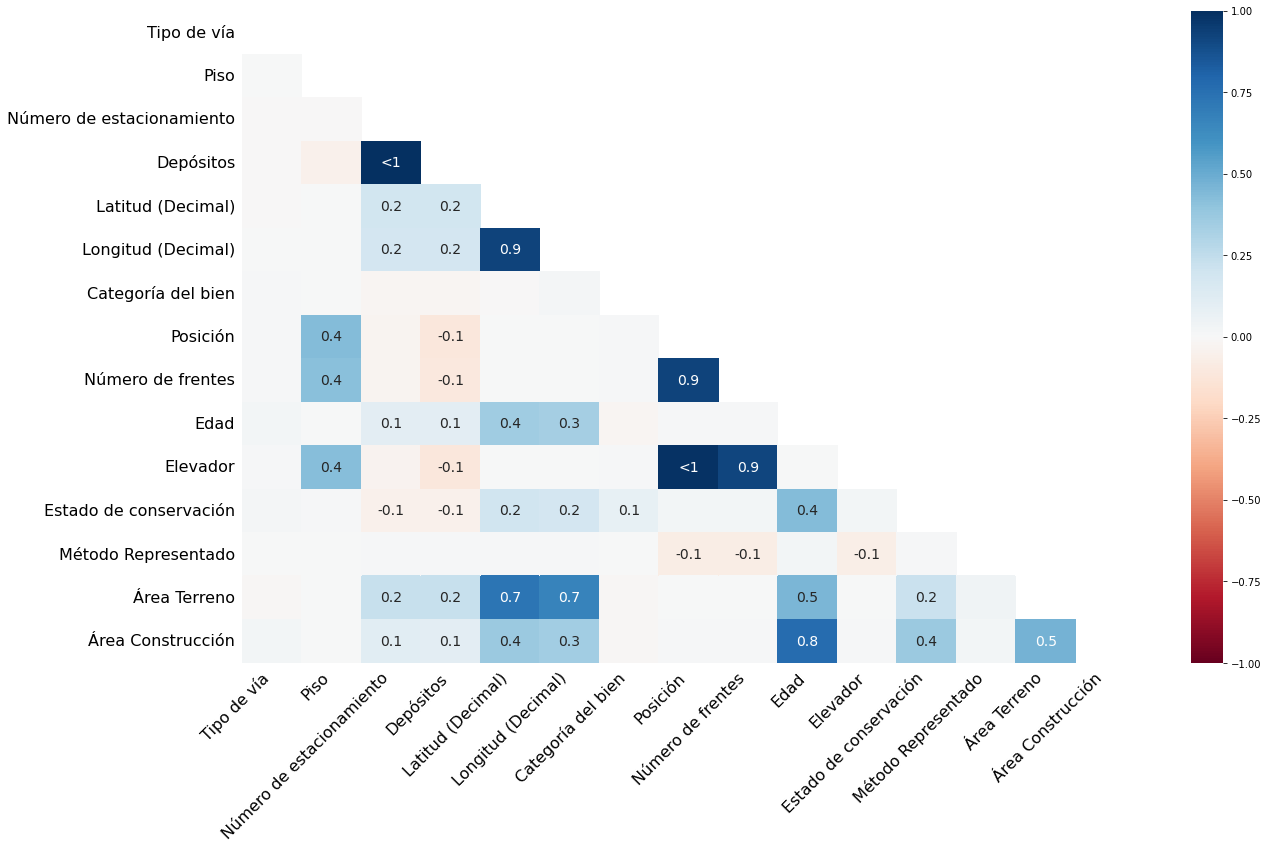

In [15]:
msno.heatmap(campos)

Sugerencia:

Eliminar campos:  Piso, Posición, Número de frentes y Elevador.

In [16]:
campos = campos.drop(['Piso', 'Posición', 'Número de frentes', 'Elevador'], axis=1)
campos.head(4)

Fecha entrega del Informe  Tipo de vía Departamento Provincia  \
0                2020-02-16          1.0        Piura     Piura   
1                2019-05-21          1.0         Lima      Lima   
2                2020-04-11          1.0        Junín    Satipo   
3                2016-05-24          1.0         Lima      Lima   

                Distrito  Número de estacionamiento  Depósitos  \
0  Veintiseis de Octubre                        NaN        NaN   
1              Surquillo                        1.0        0.0   
2                 Satipo                        0.0        0.0   
3      Santiago de Surco                        0.0        0.0   

   Latitud (Decimal)  Longitud (Decimal)    Categoría del bien  Edad  \
0          -5.163182          -80.682388  Vivienda Unifamiliar   0.0   
1         -12.115286          -77.003768          Departamento   1.0   
2         -11.235446          -74.629221  Vivienda Unifamiliar   7.0   
3         -12.126384          -76.975707               Oficina   0.0   

  Estado de conservación               Método Representado  Área Terreno  \
0        En construcción     Costos o reposición (directo)         62.50   
1                  Bueno  Comparación de mercado (directo)          9.32   
2                Regular     Costos o reposición (directo)        126.00   
3                    NaN  Comparación de mercado (directo)          8.60   

   Área Construcción  Valor comercial (USD)  
0              27.58                  25278  
1              57.47                 110807  
2              84.00                  42285  
3              82.34                 165503

### ⛏ Explorar datos categoricos

In [17]:
categoricos = ['Categoría del bien', 'Estado de conservación', 'Método Representado', 'Departamento', 'Provincia', 'Distrito']

In [18]:
print(campos['Categoría del bien'].unique())
print(len(campos['Categoría del bien'].unique()))  # nominal

['Vivienda Unifamiliar' 'Departamento' 'Oficina' 'Local Comercial'
 'AVALUOS_TIPOS_INMUEBLE_VEHICULO' 'Almacén /Taller' nan
 'Estacionamiento/depósito (U.I.)' 'Industria' 'Terreno Urbano'
 'Centro de Salud' 'Hotel' 'Intitución Educativa' 'Fundo Agrícola'
 'Terreno Rústico (eriazo)' 'Muebles y enseres' 'Maquinaria y/o Equipo']
17


In [19]:
print(campos['Estado de conservación'].unique())
print(len(campos['Estado de conservación'].unique()))  # nominal u ordinal

['En construcción' 'Bueno' 'Regular' nan 'Muy bueno' 'En proyecto' 'Malo'
 'Bueno - Regular' 'Regular - Malo']
9


In [20]:
print(campos['Método Representado'].unique())
print(len(campos['Método Representado'].unique()))  # nominal

['Costos o reposición (directo)' 'Comparación de mercado (directo)'
 'Renta o capitalización (indirecto)' nan]
4


In [21]:
print(campos['Departamento'].unique())
print(len(campos['Departamento'].unique()))

['Piura' 'Lima' 'Junín' 'Áncash' 'Ucayali' 'Arequipa' 'San Martín'
 'Callao' 'Tumbes' 'Loreto' 'Huancavelica' 'La Libertad' 'Puno'
 'Lambayeque' 'Pasco' 'Tacna' 'Huánuco' 'Cusco' 'Cajamarca' 'Apurímac'
 'Moquegua' 'Amazonas' 'Ayacucho' 'Madre de Dios']
24


In [22]:
print(campos['Provincia'].unique())
print(len(campos['Provincia'].unique()))

['Piura' 'Lima' 'Satipo' 'Huaraz' 'Coronel Portillo' 'Arequipa'
 'Moyobamba' 'Prov. Const. del Callao' 'Zarumilla' 'Maynas' 'San Martín'
 'CHINCHA' 'Trujillo' 'Alto Amazonas' 'Bellavista' 'San Román' 'Santa'
 'Concepción' 'Chiclayo' 'Barranca' 'Chanchamayo' 'Oxapampa' 'Morropón'
 'Huancayo' 'Rioja' 'Tacna' 'Cañete' 'Huancavelica' 'Leoncio Prado'
 'Cusco' 'Huaura' 'Picota' 'Huallaga' 'Huánuco' 'Cajamarca' 'Ambo' 'Islay'
 'Mariscal Cáceres' 'PISCO' 'El Dorado' 'Abancay' 'Sullana' 'Chucuito'
 'Lambayeque' 'Mariscal Nieto' 'Ilo' 'Pacasmayo' 'Huaral' 'Celendín'
 'Pasco' 'San Ignacio' 'Camaná' 'Tumbes' 'Utcubamba' 'Huamanga' 'Atalaya'
 'Chepén' 'Junín' 'Contralmirante Villar' 'Pachitea' 'Andahuaylas' 'Jaén'
 'Virú' 'Puno' 'Paita' 'Anta' 'Canta' 'Tambopata' 'Chupaca' 'Talara'
 'Huarmey' 'Canchis' 'PALPA' 'El Collao' 'Huarochirí' 'Huaylas'
 'Puerto Inca' 'Ferreñafe' 'Tarma' 'Casma' 'Ascope' 'Cutervo' 'Sechura'
 'Yauli' 'Padre Abad' 'Huamalíes' 'San Marcos' 'Requena' 'NAZCA' 'Espinar'
 'Carhuaz

In [23]:
print(campos['Distrito'].unique())
print(len(campos['Distrito'].unique()))

['Veintiseis de Octubre' 'Surquillo' 'Satipo' 'Santiago de Surco' 'Lima'
 'San Borja' 'San Juan de Miraflores' 'Huaraz' 'Barranco' 'La Victoria'
 'Ate' 'Calleria' 'Miraflores' 'José Luis Bustamante Y Rivero' 'Moyobamba'
 'Cayma' 'Bellavista' 'Zarumilla' 'Chorrillos' 'Callao' 'Iquitos'
 'Magdalena del Mar' 'San Juan de Lurigancho' 'Comas' 'Morales' 'CHINCHA'
 'La Esperanza' 'La Molina' 'Yurimaguas' 'Jesús María' 'San Rafael'
 'San Isidro' 'Juliaca' 'San Miguel' 'Trujillo' 'Chimbote' 'Yarinacocha'
 'Punta Negra' 'Pueblo Libre' 'Carabayllo' 'Matahuasi' 'Puente Piedra'
 'José Leonardo Ortiz' 'Breña' 'Supe' 'Pichanaqui' 'Santa Anita'
 'Tambo Grande' 'Piura' 'Nuevo Chimbote' 'Villa Rica' 'Chulucanas'
 'Tarapoto' 'Los Olivos' 'San Luis' 'Lince' 'Castilla'
 'Villa María del Triunfo' 'Huancayo' 'Posic' 'Chiclayo' 'Rímac'
 'Chanchamayo' 'Tacna' 'Lurin' 'La Banda de Shilcayo' 'Yura'
 'San Vicente de Cañete' 'Huancavelica' 'Rupa-Rupa' 'Cieneguilla'
 'Yanahuara' 'Lurigancho' 'San Antonio' 'San Mart

### ⛏ Explora datos cuantitativos

In [24]:
campos.describe()

Tipo de vía  Número de estacionamiento     Depósitos  \
count  48243.000000               45330.000000  45261.000000   
mean       1.959745                   0.437304      0.253463   
std        1.066075                   3.357846      9.652704   
min        1.000000                   0.000000      0.000000   
25%        1.000000                   0.000000      0.000000   
50%        2.000000                   0.000000      0.000000   
75%        3.000000                   1.000000      0.000000   
max       10.000000                 329.000000   2000.000000   

       Latitud (Decimal)  Longitud (Decimal)          Edad  Área Terreno  \
count       52391.000000        52337.000000  48465.000000  5.210100e+04   
mean           -4.672508          -95.879283     15.891922  1.050799e+04   
std          1527.774741         4370.817052     34.058588  4.703882e+05   
min           -77.064902     -1000000.000000      0.000000  0.000000e+00   
25%           -12.118135          -77.064979      2.000000  1.697000e+01   
50%           -12.079393          -77.018683      8.000000  7.035000e+01   
75%           -11.933839          -76.940540     22.000000  2.420000e+02   
max        349681.770000            1.000000   2018.000000  1.030003e+08   

       Área Construcción  Valor comercial (USD)  
count       48761.000000           5.325400e+04  
mean          318.937673           3.938422e+05  
std          1074.569879           1.081877e+06  
min             0.000000           2.100000e+01  
25%            79.900000           1.008220e+05  
50%           126.060000           1.743910e+05  
75%           261.400000           3.368082e+05  
max         60289.630000           7.501202e+07

In [25]:
figT = px.scatter(campos, x='Tipo de vía')
figT.show()

In [26]:
figNE = px.scatter(campos, x='Número de estacionamiento')
figNE.show()

In [27]:
figD = px.scatter(campos, x='Depósitos')
figD.show()

In [28]:
figLat = px.scatter(campos, x='Latitud (Decimal)')
figLat.show()

In [29]:
figLon = px.scatter(campos, x='Longitud (Decimal)')
figLon.show()

In [30]:
figE = px.scatter(campos, x='Edad')
figE.show()

In [31]:
figAT = px.scatter(campos, x='Área Terreno')
figAT.show()

In [32]:
figAC = px.scatter(campos, x='Área Construcción')
figAC.show()

In [33]:
figV = px.scatter(campos, x='Valor comercial (USD)')
figV.show()

### ⛏ Exploración de outlier

Área Terreno

In [34]:
filtro = campos['Área Terreno'] == max(campos['Área Terreno'])
planets_2008 = campos[filtro]
planets_2008.head()

Fecha entrega del Informe  Tipo de vía Departamento   Provincia  \
45670                2019-10-17          1.0         Lima  Huarochirí   

                           Distrito  Número de estacionamiento  Depósitos  \
45670  Santo Domingo de Los Olleros                        0.0        0.0   

       Latitud (Decimal)  Longitud (Decimal) Categoría del bien  Edad  \
45670         -12.325476          -76.638968     Terreno Urbano   0.0   

      Estado de conservación            Método Representado  Área Terreno  \
45670                    NaN  Costos o reposición (directo)   103000251.0   

       Área Construcción  Valor comercial (USD)  
45670                NaN                4449610

Área Construcción

In [35]:
filtro = campos['Área Construcción'] == max(campos['Área Construcción'])
planets_2008 = campos[filtro]
planets_2008.head()

Fecha entrega del Informe  Tipo de vía Departamento Provincia Distrito  \
15966                2016-10-24          5.0        Piura     Piura    Piura   

       Número de estacionamiento  Depósitos  Latitud (Decimal)  \
15966                        0.0        0.0          -5.178272   

       Longitud (Decimal) Categoría del bien  Edad Estado de conservación  \
15966          -80.660136                NaN  40.0                    NaN   

                 Método Representado  Área Terreno  Área Construcción  \
15966  Costos o reposición (directo)      184988.0           60289.63   

       Valor comercial (USD)  
15966               75012015

Latitude

In [36]:
filtro = campos['Latitud (Decimal)'] == max(campos['Latitud (Decimal)'])
planets_2008 = campos[filtro]
planets_2008.head()

Fecha entrega del Informe  Tipo de vía Departamento   Provincia  \
1762                2016-06-22          1.0   San Martín  San Martín   

      Distrito  Número de estacionamiento  Depósitos  Latitud (Decimal)  \
1762  Tarapoto                        0.0        0.0          349681.77   

      Longitud (Decimal) Categoría del bien  Edad Estado de conservación  \
1762          -1000000.0     Terreno Urbano   0.0                    NaN   

                Método Representado  Área Terreno  Área Construcción  \
1762  Costos o reposición (directo)         600.0              260.0   

      Valor comercial (USD)  
1762                 150400

In [37]:
filtro = campos['Latitud (Decimal)'] == min(campos['Latitud (Decimal)'])
planets_2008 = campos[filtro]
planets_2008.head()

Fecha entrega del Informe  Tipo de vía Departamento Provincia  \
11867                2019-08-12          3.0         Lima      Lima   

                Distrito  Número de estacionamiento  Depósitos  \
11867  Magdalena del Mar                        NaN        NaN   

       Latitud (Decimal)  Longitud (Decimal) Categoría del bien  Edad  \
11867         -77.064902          -77.064902       Departamento   1.0   

      Estado de conservación               Método Representado  Área Terreno  \
11867              Muy bueno  Comparación de mercado (directo)           3.6   

       Área Construcción  Valor comercial (USD)  
11867             107.78                 173694

Longitude

In [38]:
filtro = campos['Longitud (Decimal)'] == max(campos['Longitud (Decimal)'])
planets_2008 = campos[filtro]
planets_2008.head()

Fecha entrega del Informe  Tipo de vía Departamento Provincia  \
16808                2022-09-04          NaN   Lambayeque  Chiclayo   

                  Distrito  Número de estacionamiento  Depósitos  \
16808  José Leonardo Ortiz                        NaN        NaN   

       Latitud (Decimal)  Longitud (Decimal) Categoría del bien  Edad  \
16808                1.0                 1.0    Local Comercial  27.0   

      Estado de conservación            Método Representado  Área Terreno  \
16808                  Bueno  Costos o reposición (directo)         121.7   

       Área Construcción  Valor comercial (USD)  
16808             464.76                 161803

In [39]:
filtro = campos['Longitud (Decimal)'] == min(campos['Longitud (Decimal)'])
planets_2008 = campos[filtro]
planets_2008.head()

Fecha entrega del Informe  Tipo de vía Departamento   Provincia  \
1762                2016-06-22          1.0   San Martín  San Martín   

      Distrito  Número de estacionamiento  Depósitos  Latitud (Decimal)  \
1762  Tarapoto                        0.0        0.0          349681.77   

      Longitud (Decimal) Categoría del bien  Edad Estado de conservación  \
1762          -1000000.0     Terreno Urbano   0.0                    NaN   

                Método Representado  Área Terreno  Área Construcción  \
1762  Costos o reposición (directo)         600.0              260.0   

      Valor comercial (USD)  
1762                 150400

### ⛏ Imputaciones - cuantitatívas

Tipo de vía

In [40]:
campos["Tipo de vía"].fillna(0, inplace = True)

Número de estacionamiento

In [41]:
campos["Número de estacionamiento"].fillna(0, inplace = True)

Depósitos

In [42]:
campos["Depósitos"].fillna(0, inplace = True)

Edad

In [43]:
# Remplazar outlier
Edad = []
for i in campos["Edad"]:
  if i > 1600:
    Edad.append(2022-i)
  else:
    Edad.append(i)

In [44]:
# Reasignar campo Edad sin extremos
campos['Edad'] = Edad

In [45]:
# Remplazar faltantes por promedio
campos["Edad"].fillna(np.mean(campos["Edad"]), inplace = True)

Latitude

In [46]:
# Remplazar outlier por centroide
campos.loc[campos['Latitud (Decimal)']> -0.0290, 'Latitud (Decimal)']= -9.19
campos.loc[campos['Latitud (Decimal)']< -18.352, 'Latitud (Decimal)']= -9.19

In [47]:
# Remplazar faltantes por median
campos['Latitud (Decimal)'].fillna(np.mean(campos["Latitud (Decimal)"]), inplace = True)

Coordenadas geograficas que delimitan a Perú

*   Latitud N:  -0.03
*   Latitud S:  -18.353
*   Longitud E: -68.6575
*   Longitud O: -81.3264
*   Centroide:  
 *   Lat: -9.19
 *   Lon: -75.016




Longitude

In [48]:
# Remplazar outliers centroide
campos.loc[campos['Longitud (Decimal)']>-68.6575, 'Longitud (Decimal)']= -75.016
campos.loc[campos['Longitud (Decimal)']<-81.3264, 'Longitud (Decimal)']= -75.016

In [49]:
# Remplazar faltantes por median
campos["Longitud (Decimal)"].fillna(np.mean(campos['Longitud (Decimal)']), inplace = True)

Categoria del bien

In [50]:
campos['Categoría del bien'].fillna('Otro', inplace = True)

Área Terreno

Por categoria del bien

1.   promedio



In [51]:
cb = campos['Categoría del bien'].unique()
len(cb)

17

In [52]:
promedios = []
for kk in cb:
  mask1 = campos['Categoría del bien'] == kk
  mask2 = (campos['Categoría del bien'] == kk) & (campos['Área Terreno'] == np.nan)
  promedios.append(np.mean(campos.loc[mask1, 'Área Terreno']))
promedios

[654.8773080430421,
 391.58499283667624,
 164.6297035040431,
 5703.349825758936,
 12445.253786407768,
 3030.9973643410854,
 18941.18177419355,
 455.79485057471265,
 27925.46671403197,
 75958.3544768473,
 485.2622222222222,
 953.3273899371069,
 2506.3511111111115,
 306472.306875,
 214400.49205882355,
 0.0,
 0.0]

In [53]:
for f in range(17):
  campos.loc[campos['Categoría del bien']==cb[f], 'Área Terreno'] = promedios[f]

Área Construcción

In [54]:
campos['Área Construcción'].fillna(0, inplace = True)

Estado de conservación

In [55]:
campos['Estado de conservación'].fillna('Otros', inplace = True)

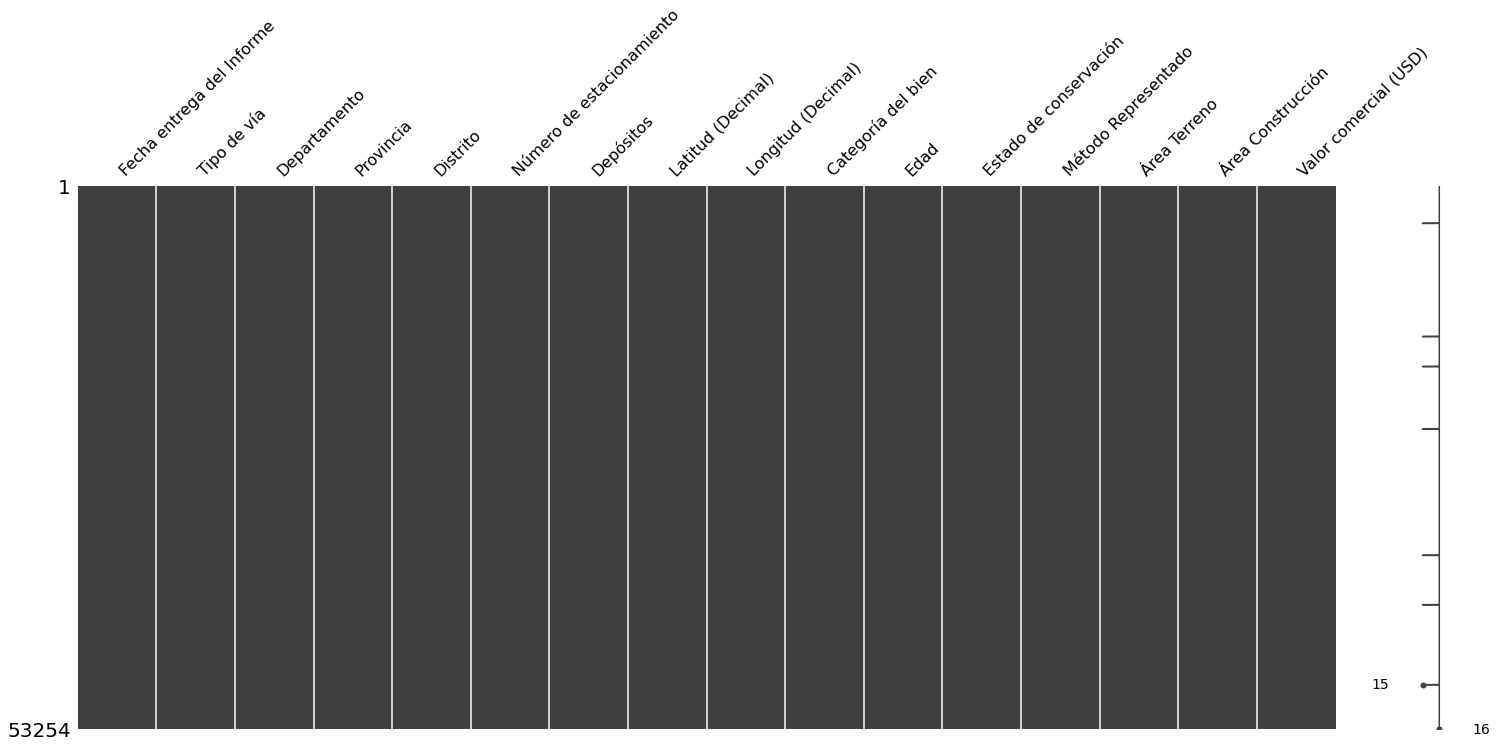

In [56]:
msno.matrix(campos)

### ⛏ Imputaciones - categóricas

Todos los casos OneHotEncoding

In [57]:
categoricos

['Categoría del bien',
 'Estado de conservación',
 'Método Representado',
 'Departamento',
 'Provincia',
 'Distrito']

In [58]:
kate = pd.get_dummies(campos)
kate

Fecha entrega del Informe  Tipo de vía  Número de estacionamiento  \
0                    2020-02-16          1.0                        0.0   
1                    2019-05-21          1.0                        1.0   
2                    2020-04-11          1.0                        0.0   
3                    2016-05-24          1.0                        0.0   
4                    2016-01-12          3.0                        0.0   
...                         ...          ...                        ...   
53249                2019-07-18          1.0                        0.0   
53250                2017-10-22          3.0                        1.0   
53251                2021-05-31          3.0                        0.0   
53252                2018-07-11          3.0                        1.0   
53253                2018-07-17          4.0                        0.0   

       Depósitos  Latitud (Decimal)  Longitud (Decimal)  Edad  Área Terreno  \
0            0.0          -5.163182          -80.682388   0.0    654.877308   
1            0.0         -12.115286          -77.003768   1.0    391.584993   
2            0.0         -11.235446          -74.629221   7.0    654.877308   
3            0.0         -12.126384          -76.975707   0.0    164.629704   
4            0.0         -12.089613          -76.994475  43.0    654.877308   
...          ...                ...                 ...   ...           ...   
53249        0.0         -12.079598          -76.976514  34.0    654.877308   
53250        0.0         -12.088102          -77.064252   4.0    391.584993   
53251        0.0         -12.087071          -77.035483  64.0    391.584993   
53252        0.0         -12.030869          -77.025853   4.0    391.584993   
53253        0.0          -8.088020          -78.999926   3.0   5703.349826   

       Área Construcción  Valor comercial (USD)  ...  \
0                  27.58                  25278  ...   
1                  57.47                 110807  ...   
2                  84.00                  42285  ...   
3                  82.34                 165503  ...   
4                 423.22                 711009  ...   
...                  ...                    ...  ...   
53249             282.80                 604241  ...   
53250              86.56                 132721  ...   
53251              65.77                  98655  ...   
53252              70.15                  79553  ...   
53253             247.70                 127045  ...   

       Estado de conservación_En construcción  \
0                                           1   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
53249                                       0   
53250                                       0   
53251                                       0   
53252                                       0   
53253                                       0   

       Estado de conservación_En proyecto  Estado de conservación_Malo  \
0                                       0                            0   
1                                       0                            0   
2                                       0                            0   
3                                       0                            0   
4                                       0                            0   
...                                   ...                          ...   
53249                                   0                            0   
53250                                   0                            0   
53251                                   0                            0   
53252                                   0                            0   
53253                                   0                            0   

     

In [59]:
kate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53254 entries, 0 to 53253
Columns: 686 entries, Fecha entrega del Informe to Método Representado_Renta o capitalización (indirecto)
dtypes: datetime64[ns](1), float64(8), int64(1), uint8(676)
memory usage: 38.4 MB


In [60]:
kate.describe()

Tipo de vía  Número de estacionamiento     Depósitos  \
count  53254.000000               53254.000000  53254.000000   
mean       1.775341                   0.372235      0.215420   
std        1.164886                   3.101874      8.899317   
min        0.000000                   0.000000      0.000000   
25%        1.000000                   0.000000      0.000000   
50%        1.000000                   0.000000      0.000000   
75%        3.000000                   0.000000      0.000000   
max       10.000000                 329.000000   2000.000000   

       Latitud (Decimal)  Longitud (Decimal)          Edad   Área Terreno  \
count       53254.000000        53254.000000  53254.000000   53254.000000   
mean          -11.345278          -76.790573     15.485691   10566.376632   
std             2.457108            1.741169     17.880825   24414.336994   
min           -18.265803          -81.307987      0.000000       0.000000   
25%           -12.117211          -77.063889      2.000000     391.584993   
50%           -12.078351          -77.016771     10.000000     654.877308   
75%           -11.927770          -76.929534     21.000000    5703.349826   
max            -3.100270          -69.039800    595.000000  306472.306875   

       Área Construcción  Valor comercial (USD)  Departamento_Amazonas  ...  \
count       53254.000000           5.325400e+04           53254.000000  ...   
mean          292.029141           3.938422e+05               0.000300  ...   
std          1032.054074           1.081877e+06               0.017331  ...   
min             0.000000           2.100000e+01               0.000000  ...   
25%            70.390000           1.008220e+05               0.000000  ...   
50%           114.840000           1.743910e+05               0.000000  ...   
75%           240.970000           3.368082e+05               0.000000  ...   
max         60289.630000           7.501202e+07               1.000000  ...   

       Estado de conservación_En construcción  \
count                            53254.000000   
mean                                 0.067845   
std                                  0.251482   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       Estado de conservación_En proyecto  Estado de conservación_Malo  \
count                        53254.000000                 53254.000000   
mean                             0.022609                     0.006291   
std                              0.148654                     0.079064   
min                              0.000000                     0.000000   
25%                              0.000000                     0.000000   
50%                              0.000000                     0.000000   
75%                              0.000000                     0.000000   
max                              1.000000                     1.000000   

       Estado de conservación_Muy bueno  Estado de conservación_Otros  \
count                      53254.000000                  53254.000000   
mean                           0.070755                      0.294814   
std                            0.256418                      0.455963   
min                            0.000000                      0.000000   
25%                            0.000000                      0.000000   
50%                            0.000000                      0.000000   
75%                            0.000000                      1.000000   
max                            1.000000                      1.000000   

       Estado de conservación_Regular  Estado de conservación_Regular - Malo  \
count                    53254.000000                           53254.000000   
mean                         0.119240                               0.000019   
std               

### ⛏ Correlaciones cuantitativas

In [61]:
cuantitativos = ['Valor comercial (USD)','Tipo de vía','Número de estacionamiento','Depósitos','Latitud (Decimal)','Longitud (Decimal)','Edad','Área Terreno','Área Construcción']

In [62]:
corr_P = pd.DataFrame()
corr_P['index'] = cuantitativos
corr_P.set_index('index', inplace = True)

In [63]:
pearson = []
p1 = campos['Valor comercial (USD)'].values.tolist()
for c2 in cuantitativos:
  p2 = campos[c2].values.tolist()
  pearson.append(round(np.corrcoef(p1, p2)[0][1],4))
corr_P['Valor comercial (USD)'] = pearson

In [64]:
fig_C = px.imshow(corr_P.T, text_auto=True)
fig_C.show()

Tipo de vía

In [65]:
corr_P = pd.DataFrame()
corr_P['index'] = cuantitativos
corr_P.set_index('index', inplace = True)
pearson = []

p1 = campos['Valor comercial (USD)'].values.tolist()
p3 = campos['Tipo de vía'].values.tolist()
for c2 in cuantitativos:
  p2 = campos[c2].values.tolist()
  pearson.append(round(np.corrcoef(p1, np.sqrt(np.multiply(p2,p3)))[0][1],4))
corr_P['Valor comercial (USD)'] = pearson

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning:

invalid value encountered in sqrt



In [66]:
fig_C = px.imshow(corr_P.T, text_auto=True)
fig_C.show()

Número de estacionamiento

In [67]:
corr_P = pd.DataFrame()
corr_P['index'] = cuantitativos
corr_P.set_index('index', inplace = True)
pearson = []

p1 = campos['Valor comercial (USD)'].values.tolist()
p3 = campos['Número de estacionamiento'].values.tolist()
for c2 in cuantitativos:
  p2 = campos[c2].values.tolist()
  pearson.append(round(np.corrcoef(p1, np.sqrt(np.multiply(p2,p3)))[0][1],4))
corr_P['Valor comercial (USD)'] = pearson

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning:

invalid value encountered in sqrt



In [68]:
fig_C = px.imshow(corr_P.T, text_auto=True)
fig_C.show()

Depositos

In [69]:
corr_P = pd.DataFrame()
corr_P['index'] = cuantitativos
corr_P.set_index('index', inplace = True)
pearson = []

p1 = campos['Valor comercial (USD)'].values.tolist()
p3 = campos['Depósitos'].values.tolist()
for c2 in cuantitativos:
  p2 = campos[c2].values.tolist()
  pearson.append(round(np.corrcoef(p1, np.sqrt(np.multiply(p2,p3)))[0][1],4))
corr_P['Valor comercial (USD)'] = pearson

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning:

invalid value encountered in sqrt



In [70]:
fig_C = px.imshow(corr_P.T, text_auto=True)
fig_C.show()

Edad

In [71]:
corr_P = pd.DataFrame()
corr_P['index'] = cuantitativos
corr_P.set_index('index', inplace = True)
pearson = []

p1 = campos['Valor comercial (USD)'].values.tolist()
p3 = campos['Edad'].values.tolist()
for c2 in cuantitativos:
  p2 = campos[c2].values.tolist()
  pearson.append(round(np.corrcoef(p1, np.sqrt(np.multiply(p2,p3)))[0][1],4))
corr_P['Valor comercial (USD)'] = pearson

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning:

invalid value encountered in sqrt



In [72]:
fig_C = px.imshow(corr_P.T, text_auto=True)
fig_C.show()

Área Terreno

In [73]:
corr_P = pd.DataFrame()
corr_P['index'] = cuantitativos
corr_P.set_index('index', inplace = True)
pearson = []

p1 = campos['Valor comercial (USD)'].values.tolist()
p3 = campos['Área Terreno'].values.tolist()
for c2 in cuantitativos:
  p2 = campos[c2].values.tolist()
  pearson.append(round(np.corrcoef(p1, np.sqrt(np.multiply(p2,p3)))[0][1],4))
corr_P['Valor comercial (USD)'] = pearson

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning:

invalid value encountered in sqrt



In [74]:
fig_C = px.imshow(corr_P.T, text_auto=True)
fig_C.show()

Tipo Via - Área - Edad

In [75]:
corr_P = pd.DataFrame()
corr_P['index'] = cuantitativos
corr_P.set_index('index', inplace = True)
pearson = []

p1 = campos['Valor comercial (USD)'].values.tolist()
p3 = np.multiply(campos['Área Terreno'].values.tolist(), campos['Tipo de vía'].values.tolist())
for c2 in cuantitativos:
  p2 = campos[c2].values.tolist()
  pearson.append(round(np.corrcoef(p1, np.sqrt(np.multiply(p2,p3)))[0][1],4))
corr_P['Valor comercial (USD)'] = pearson

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning:

invalid value encountered in sqrt



In [76]:
fig_C = px.imshow(corr_P.T, text_auto=True)
fig_C.show()

## 🔮 Modelos prueba predicción

### 🚝 Separación de datos

In [77]:
kate.fillna(method ='ffill', inplace = True)

In [78]:
Y =kate['Valor comercial (USD)']

In [79]:
X = kate.drop(['Fecha entrega del Informe','Valor comercial (USD)'], axis=1)

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.9)

### 🚝 Lineal

In [81]:
from sklearn.linear_model import LinearRegression
linear_regresion = LinearRegression()

In [82]:
linear_regresion.fit(x_train,y_train)

LinearRegression()

In [83]:
y_preL = linear_regresion.predict(x_test)

### 🚝 Decision trhee

In [84]:
from sklearn.tree import DecisionTreeRegressor
DtreeR = DecisionTreeRegressor(random_state=17)

In [85]:
DtreeR.fit(x_train,y_train)

DecisionTreeRegressor(random_state=13)

In [86]:
y_preD = DtreeR.predict(x_test)

### 🚝 Random Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor
forestR = RandomForestRegressor(n_estimators=11, random_state=42)

In [88]:
forestR.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [89]:
y_preR = forestR.predict(x_test)

## ⭕ Evaluar modelo metricas BBVA

### Precisión global

In [90]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

Lineal

In [91]:
mean_absolute_percentage_error(y_test,y_preL)

4146.071186366334

Decision Tree

In [92]:
mean_absolute_percentage_error(y_test, y_preD)

0.6604159356858507

Random Forest

In [93]:
mean_absolute_percentage_error(y_test, y_preR)

0.5349674598022028

### Precisión por drivers

Nota:

yR es un dataframe, mientras que yP en un vector.

In [95]:
def PDrive(yR,yP,xtest,driver):
  R_r = yR.iloc[(xtest[driver] == 1).values]
  P_p = yP[(xtest[driver] == 1).values]
  return mean_absolute_percentage_error(R_r, P_p)

## 🥇 Exportar - Importar Modelo

In [115]:
# Exportar modelo
from joblib import dump
dump(forestR, '/content/drive/MyDrive/22_Hackathon/modelPredict.joblib')

['/content/drive/MyDrive/22_Hackathon/modelPredict.joblib']

In [114]:
# Importar modelo
from joblib import load
modelo = load('/content/drive/MyDrive/22_Hackathon/modelPredict.joblib')

In [107]:
# para prueba
probar = list(x_test.iloc[2427,:])

In [103]:
modelo.predict(x_test)

array([263926.2       , 100756.        , 499718.1       , ...,
       497089.4       , 219284.1       ,  33160.72555556])

In [109]:
modelo.predict([probar])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([100322.])

In [111]:
y_test[2427]

112656

In [112]:
import pickle

In [ ]:
pickle.dumps(forestR, open('/content/drive/MyDrive/22_Hackathon/modeloF.sav', 'wb'))

In [117]:
with open('/content/drive/MyDrive/22_Hackathon/modelo_1.sav', 'wb') as file:
    pickle.dump(modelo, file)